In [6]:
PATH = '../WESAD/S2/S2.pkl'

In [7]:
import pandas as pd

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [9]:
import numpy as np

In [49]:
def convert_to_1d_array(data_2d):
    data_1d = []
    
    for point in data_2d:
        data_1d.append(point[0])
        
    return data_1d

In [53]:
def equal_size_binning(data_1d, nbins=5) :
    max_val = np.max(data_1d)
    min_val = np.min(data_1d)
    
    bin_size = (max_val - min_val)/nbins
    bins = []
    
    for point in data_1d:
        bin_num = (point - min_val) // bin_size
        bins.append(bin_num)
        
    return {'bin_size': bin_size, 'bins' : bins}

In [54]:
subject = pd.read_pickle(PATH)
print(subject)

{'signal': {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.14898682],
       [-1.12457275],
       

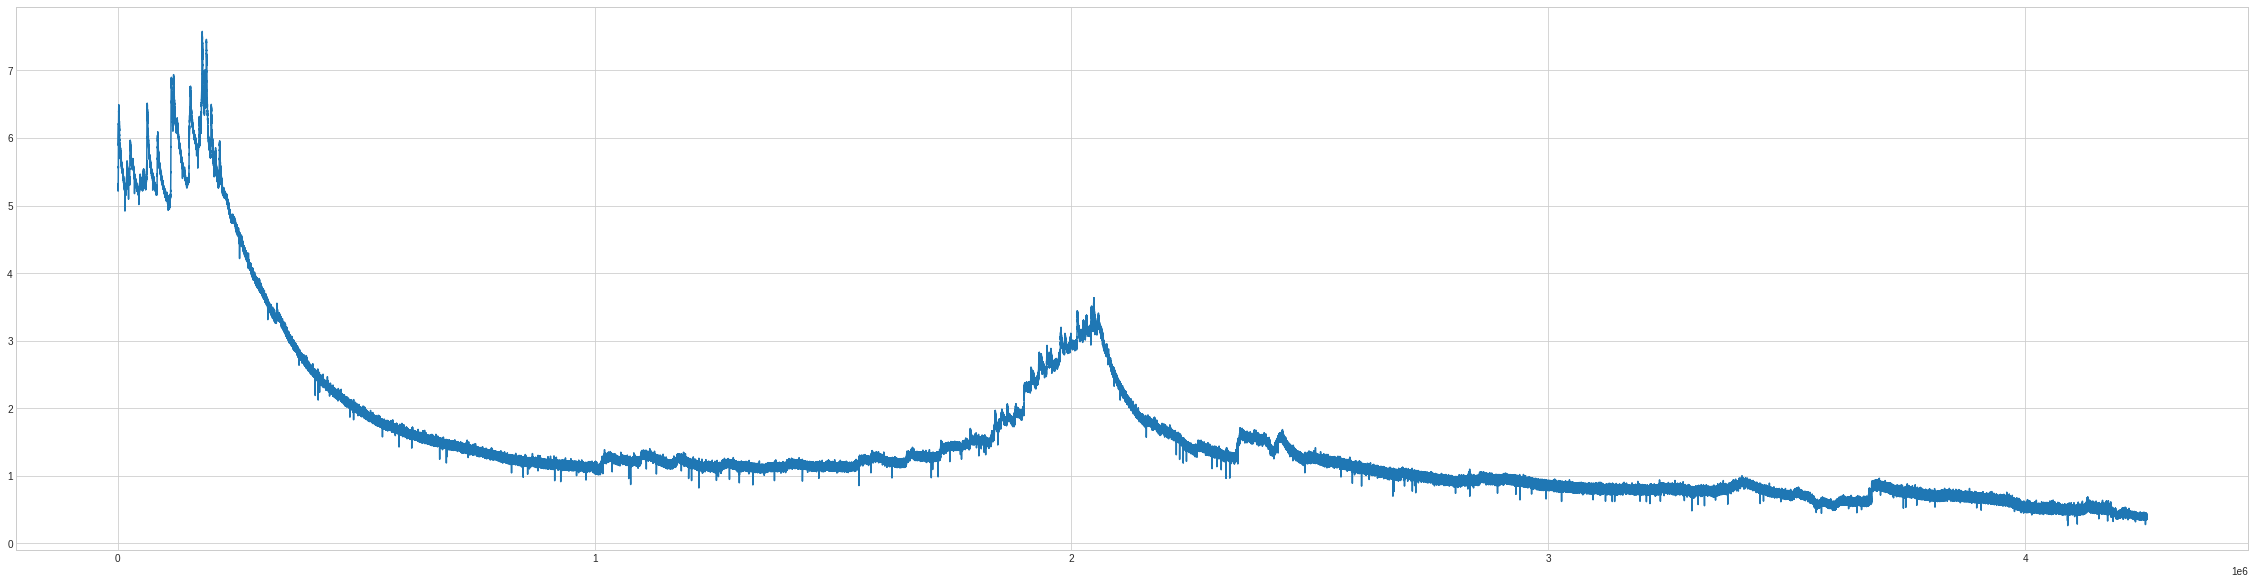

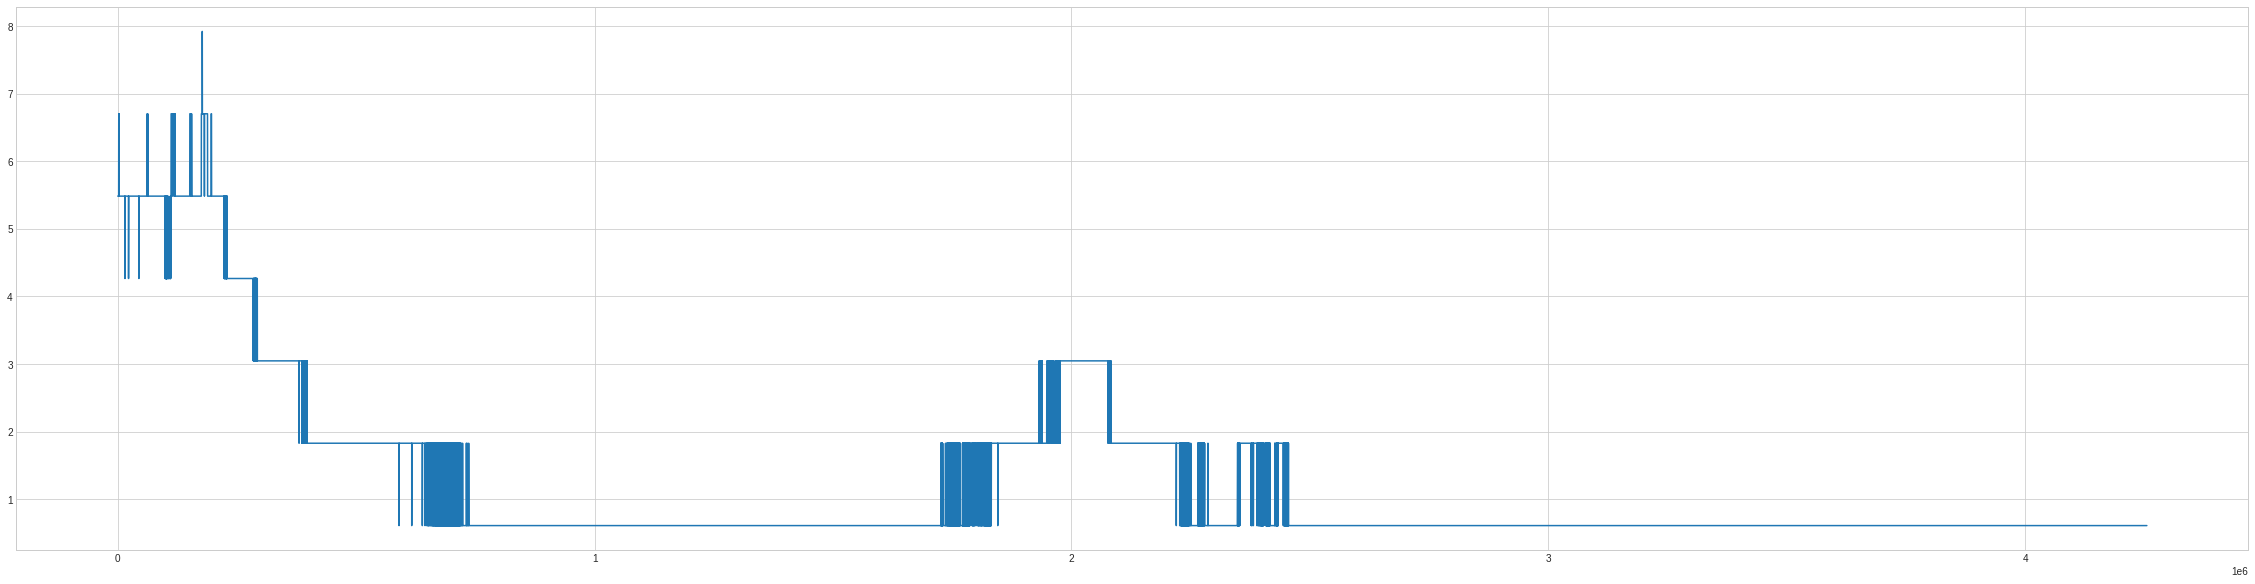

In [58]:
# Binned Temp Data 
temp_data = convert_to_1d_array(subject['signal']['chest']['EDA'])
temp_bins = equal_size_binning(temp_data, nbins=6)

x_axis = np.arange(0, len(temp_data))
y_axis = []

bin_size = temp_bins['bin_size']

for bin_cat in temp_bins['bins']:
    y_axis.append((bin_cat + 0.5) * bin_size)
   
plt.figure(figsize=(40, 10))
display(plt.plot(x_axis, temp_data))

plt.figure(figsize=(40, 10))
display(plt.plot(x_axis, y_axis))

In [ ]:
x = np.arange(1, len(chest_ECG) + 1)
y = []

for point in chest_ECG:
    y.append(point[0])

plt.figure(figsize=(40, 10))
display(plt.plot(x, y))

In [ ]:
z = []
m = 0
n = len(y)

for p in y:
    m += p

m /= n

for p in y:
    z.append((p-m)**2)

In [ ]:
plt.figure(figsize=(40, 10))
display(plt.plot(x, z))